Importar Bibliotecas e Bases de Dados

In [2]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [3]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('dataset')

bases = []

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]

    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))

    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    bases.append(df)

base_airbnb = pd.concat(bases)
display(base_airbnb)

C:\Users\victo\AppData\Local\Temp\ipykernel_8400\740097714.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\victo\AppData\Local\Temp\ipykernel_8400\740097714.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\victo\AppData\Local\Temp\ipykernel_8400\740097714.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\victo\AppData\Local\Temp\ipykernel_8400\740097714.py:14: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\victo\AppData\Local\Temp\ipykernel_8400\740097714.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Spec

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

- Iremos excluir algumas colunas para diminuir a lentidão e evitar o uso de colunas não importantes
- Tipos de colunas que iremos excluir:
    1. Ids, links e informações não relevantes para o modelo
    2. Colunas repetidas ou parecidas com outra. Ex: Data x Ano/Mes
    3. Colunas preenchidas com texto livre
    4. Colunos em que todos ou quase todos os valores são iguais
    5.
- Para isso, vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa

In [4]:
print(list(base_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [5]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=',')

In [6]:
print(base_airbnb[['host_acceptance_rate']].value_counts())

host_acceptance_rate
100%                    31697
0%                       4744
50%                      3781
99%                      3320
67%                      3140
                        ...  
28%                        22
15%                        21
7%                         20
51%                        18
6%                         11
Name: count, Length: 100, dtype: int64


In [7]:
print((base_airbnb['host_listings_count']==base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
Name: count, dtype: int64


In [8]:
print(base_airbnb['square_feet'].isnull().sum())

888162


In [9]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

Tratar Valores Faltando
- Ao visualizar os dados, percebi que existe algumas colunas com muitos dados faltando, assim, excluimos colunas com mais de 300.000 valores faltando
- Para as outras, iremos tirar somente as linhas que contém dados NaN.

In [10]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
        
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [11]:
print(base_airbnb.shape)

(902210, 23)


In [12]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)

(897709, 23)


In [13]:
print(base_airbnb.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


Com isso, tratamos todos os dados faltantes

Verificando os tipos de dados em cada coluna

In [14]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

Ao verificar, percebi que os tipos de dados de algumas colunas estão errados, como é o caso da coluna *price* e *extra_people*, que estão como objetos.
Então a seguir iremos tratar as colunas para alterar o tipo de variável da coluna

In [15]:
#Tratando a coluna price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
#Tratando a coluna extra_people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)
#Verificando os tipos
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


Análise Exploratoria e Tratar Outliers

<Axes: >

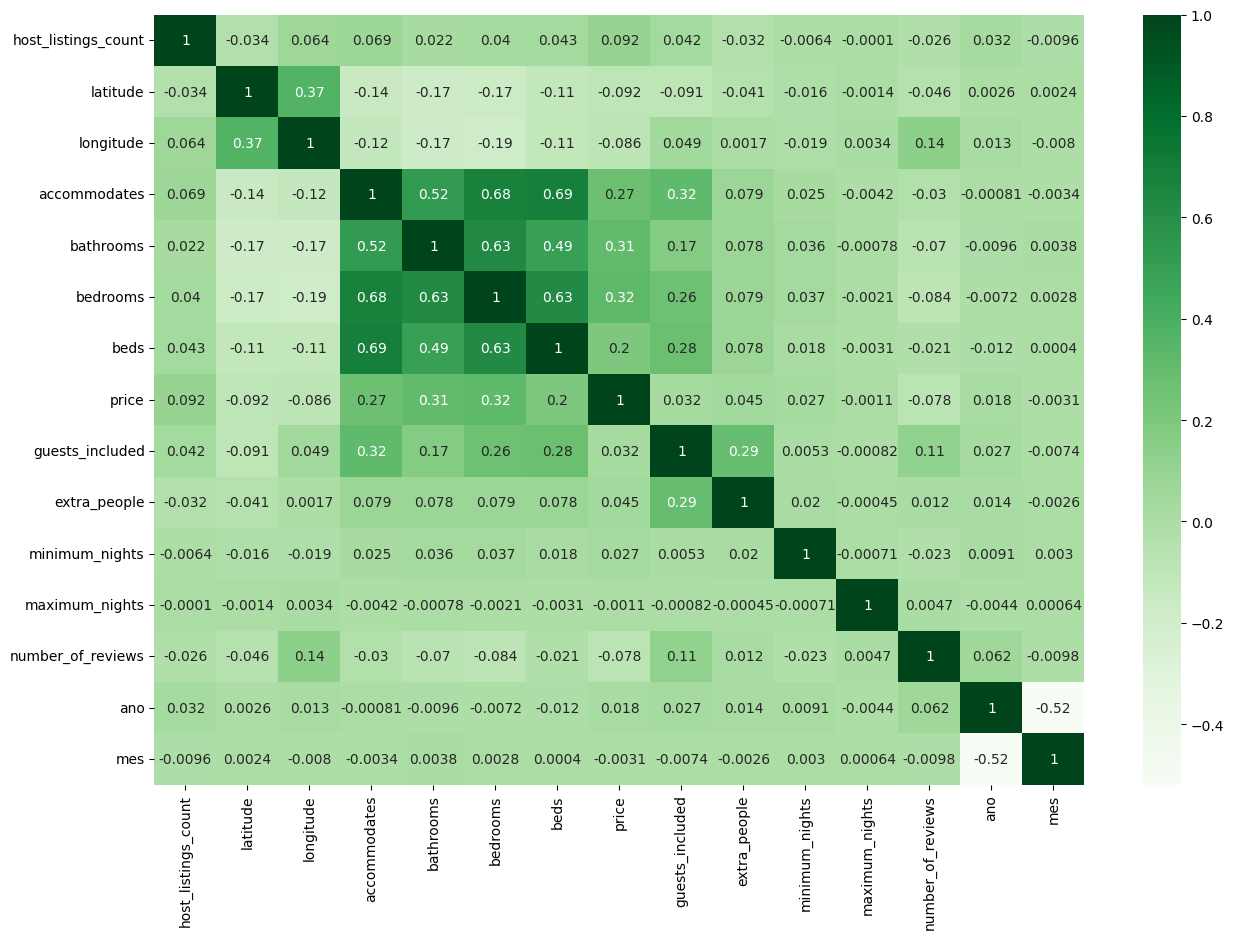

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(numeric_only=True), annot=True, cmap='Greens')
#print(base_airbnb.corr(numeric_only=True))

Definição de Funções para Análise de Outliers

Vamos definir algumas funções para ajudar na análise de outliers da colunas

In [17]:
def limites (coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0] 
    return df, linhas_removidas

In [18]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, element='bars')

def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Price

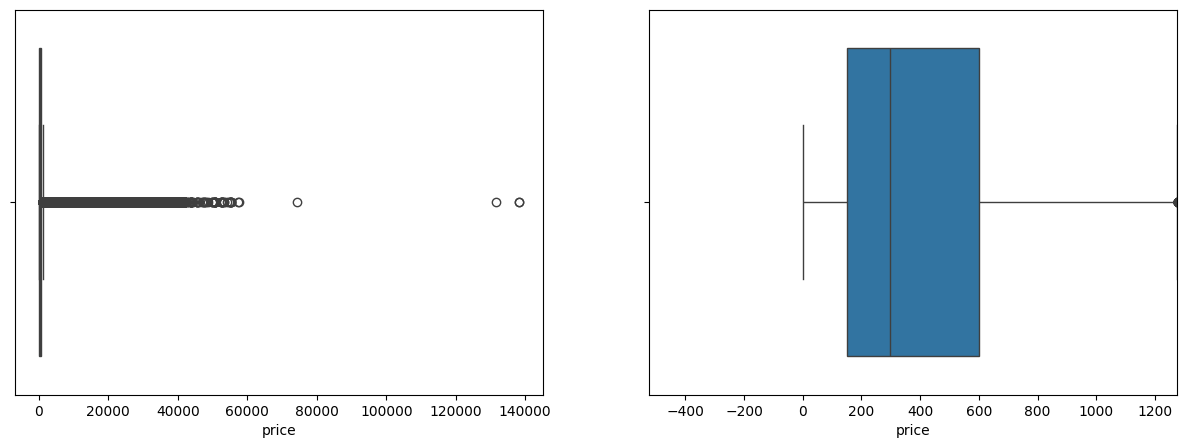

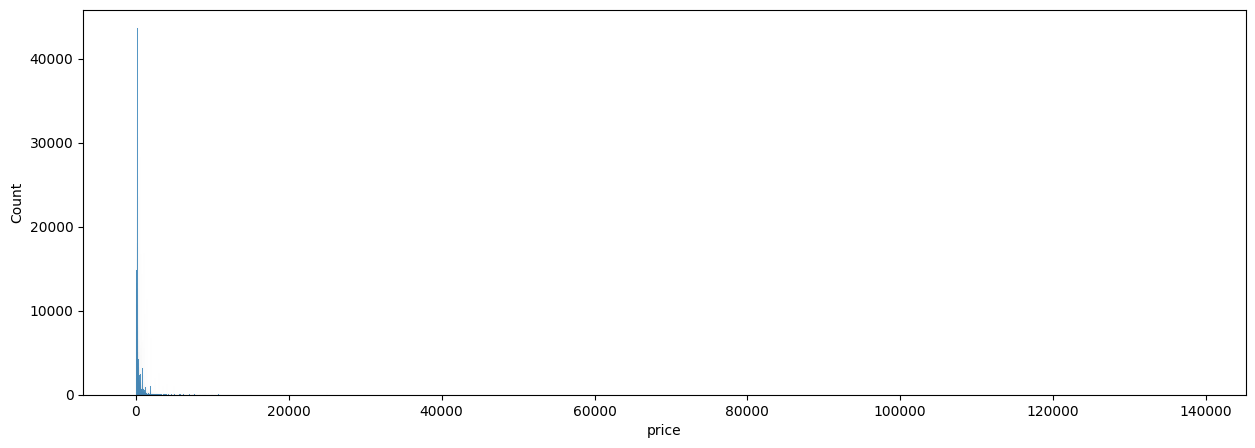

In [19]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas

de apartamentos de altissimo luxo, que não é o nosso objetivo principal. Por isso, podemos excluir esses Outliers.

In [20]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


Com isso, fica muito mais facil de enxergar as informações que queremos no gráfico

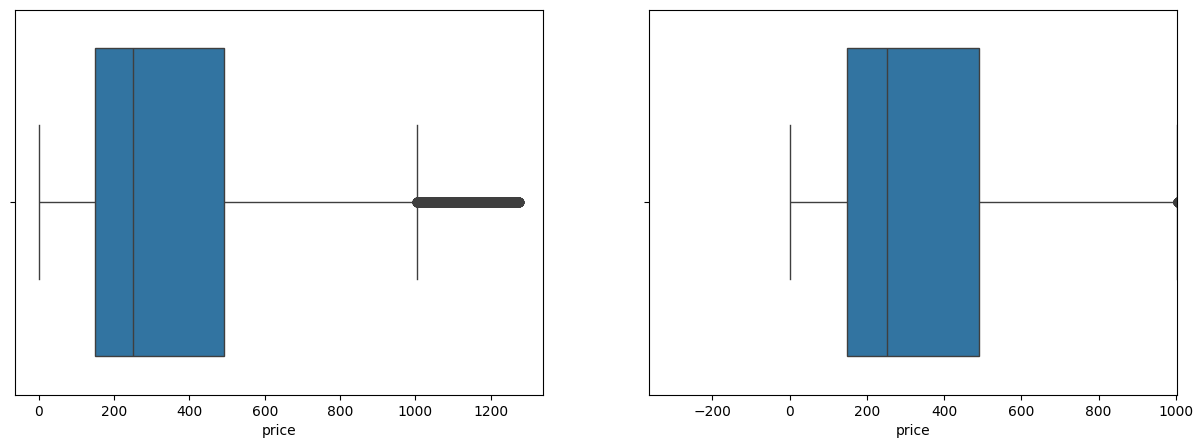

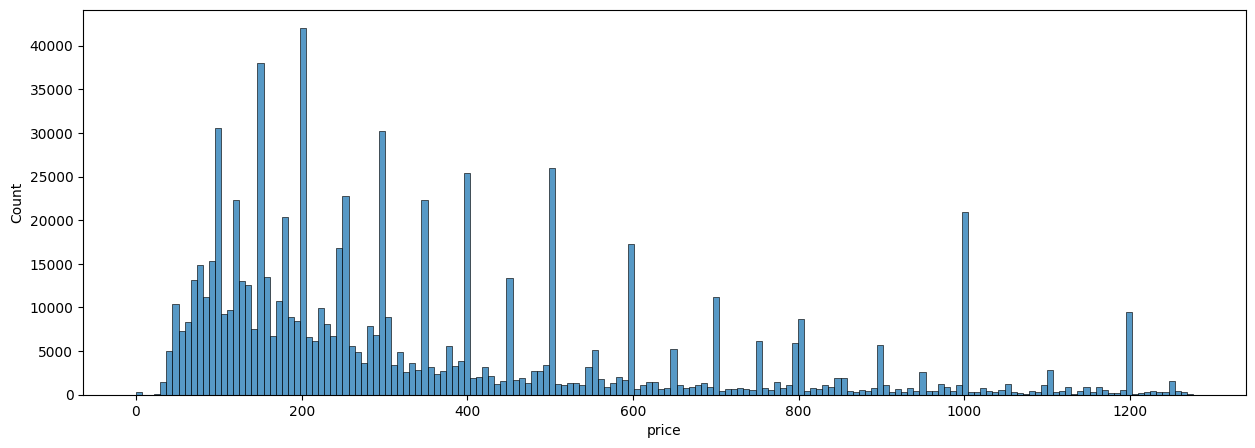

In [21]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

É interessante perceber uma convenção das pessoas de colocar valores exatos como preço ao vermos maiores quantidades de diarias com preços que terminam com 0

Em seguida irei analisar todas as outras features e tirar os outliers necessários

### Extra people

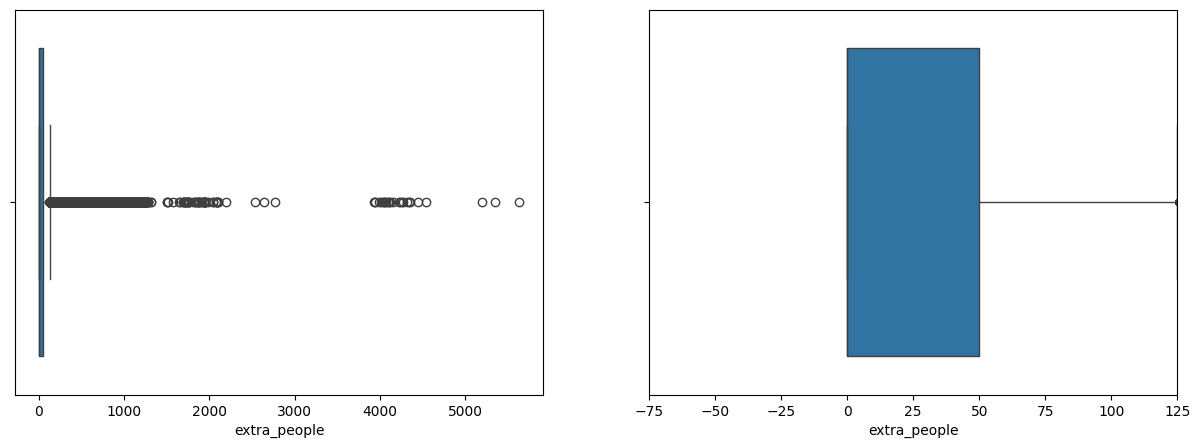

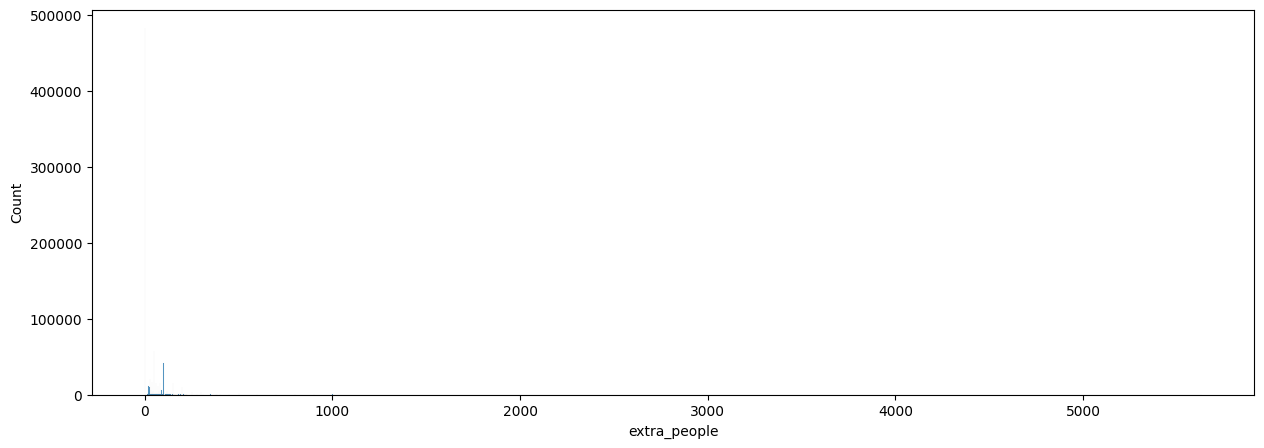

In [22]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [23]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


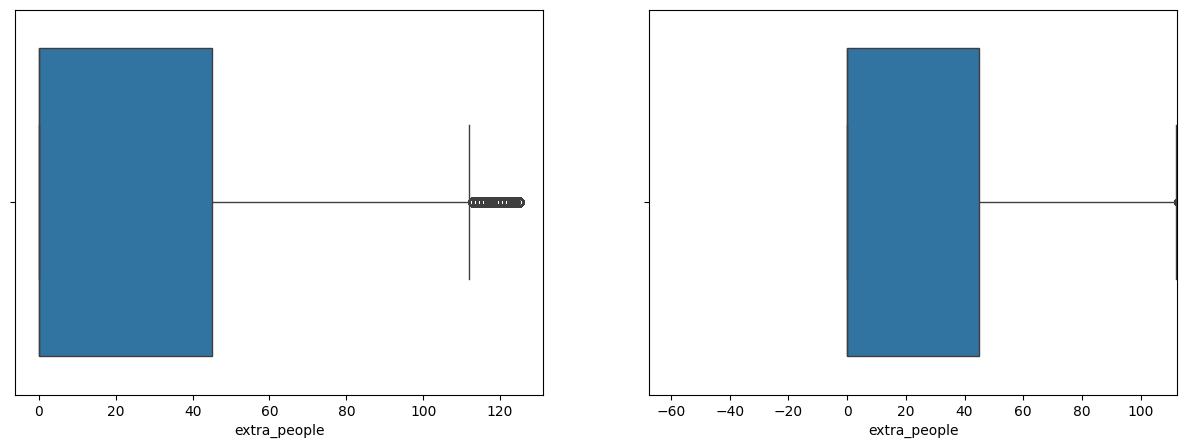

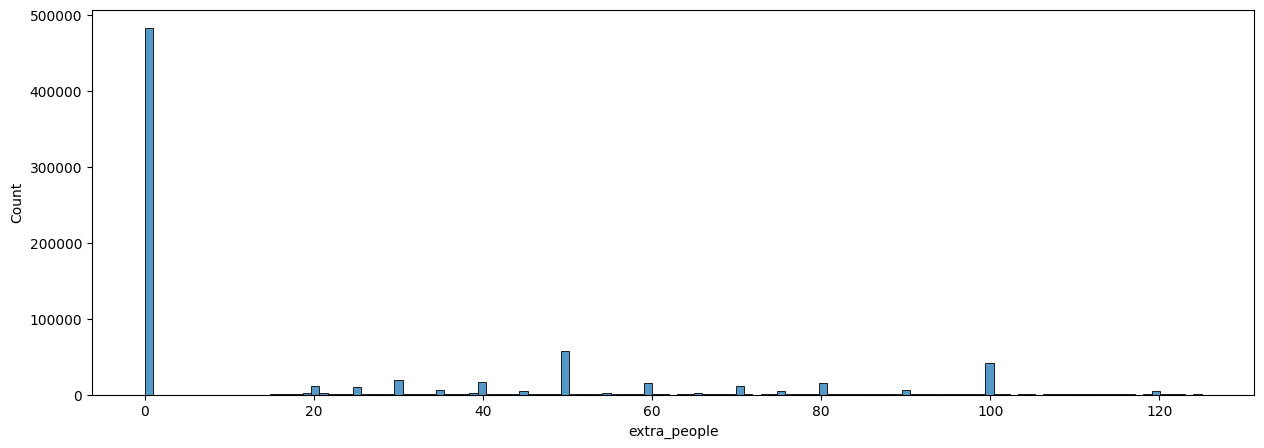

In [24]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

### Host_listing_count

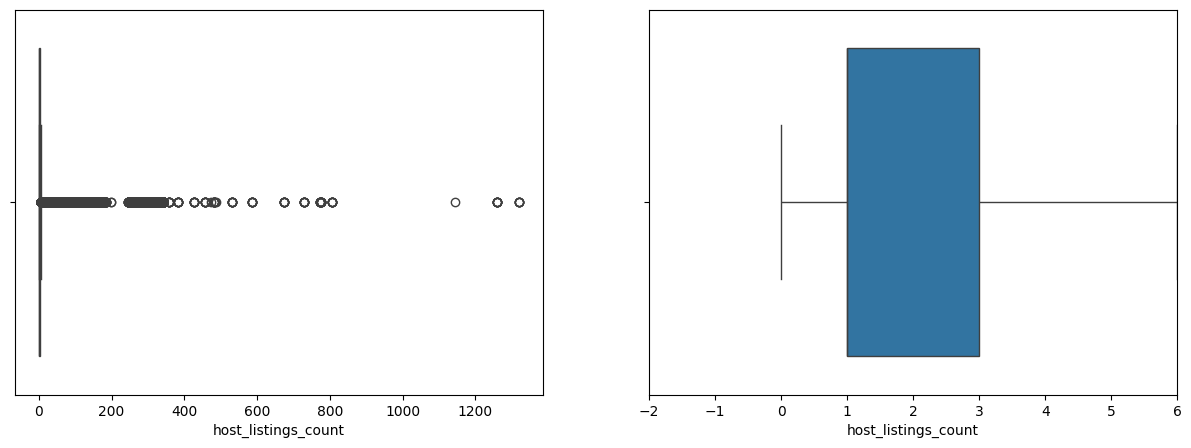

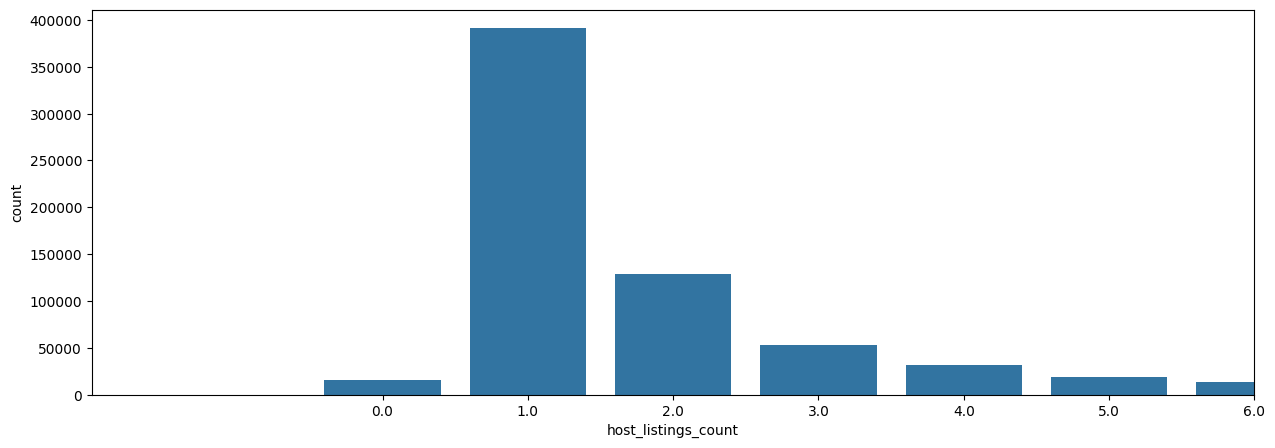

In [25]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers, porque hosts com mais de 6 imoveis nao se encaixam no objetivo do projeto

In [26]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

97723 linhas removidas


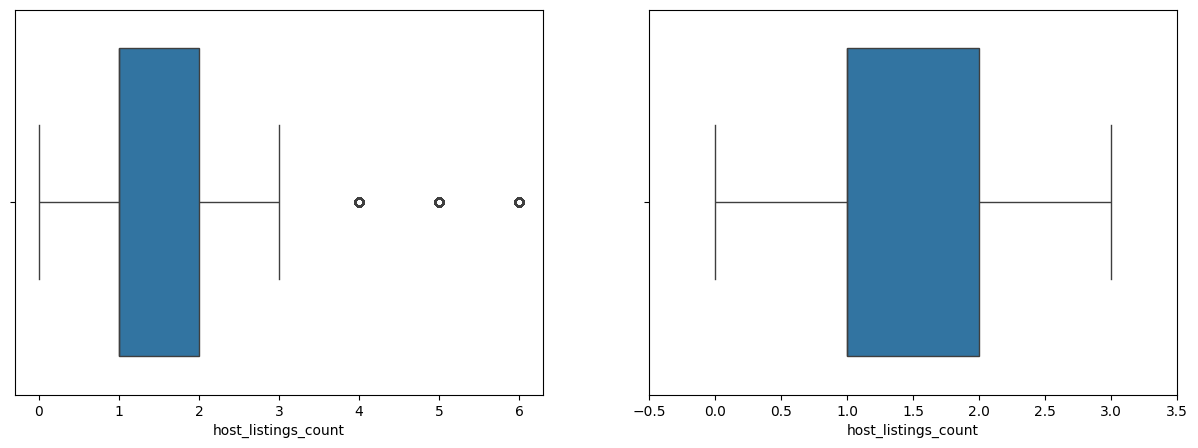

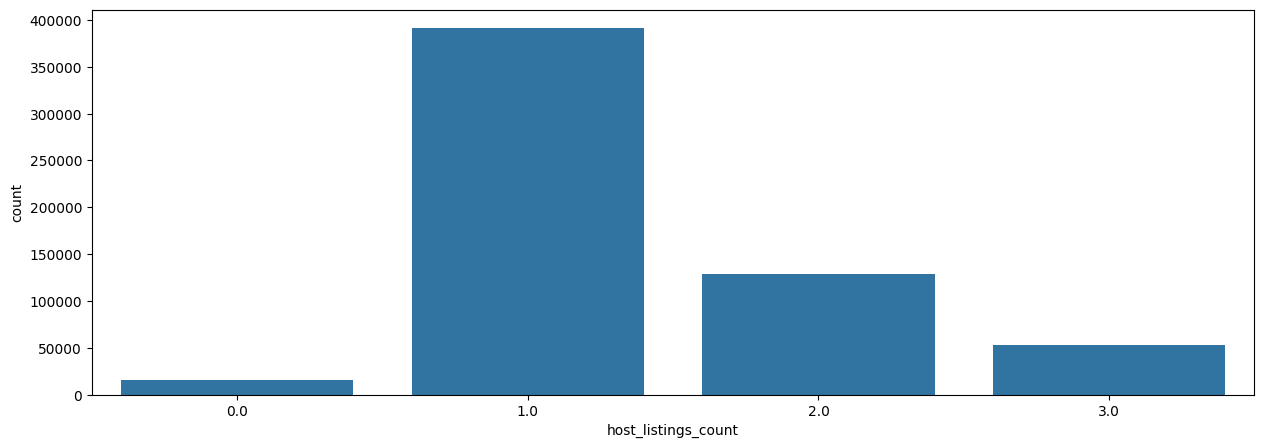

In [27]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

### Accomodates

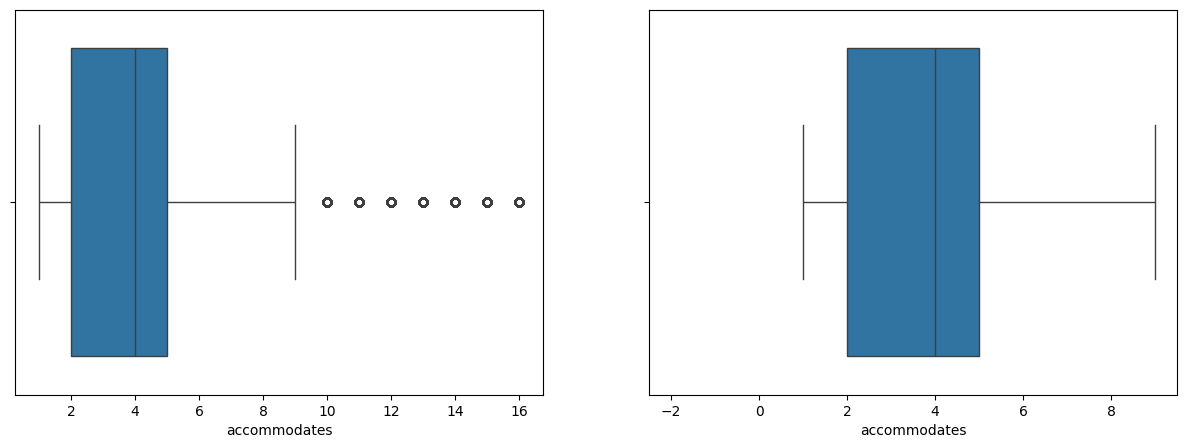

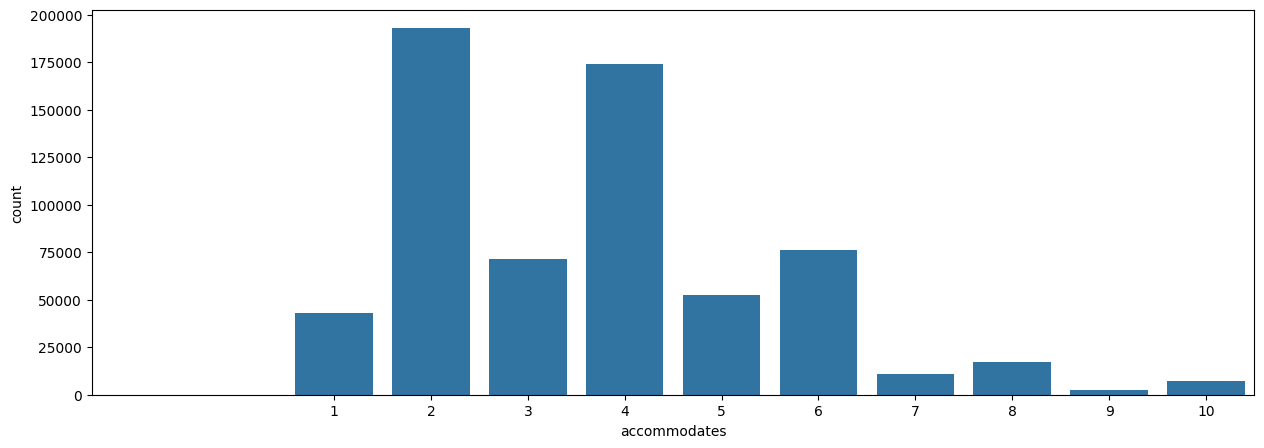

In [28]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [29]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

13146 linhas removidas


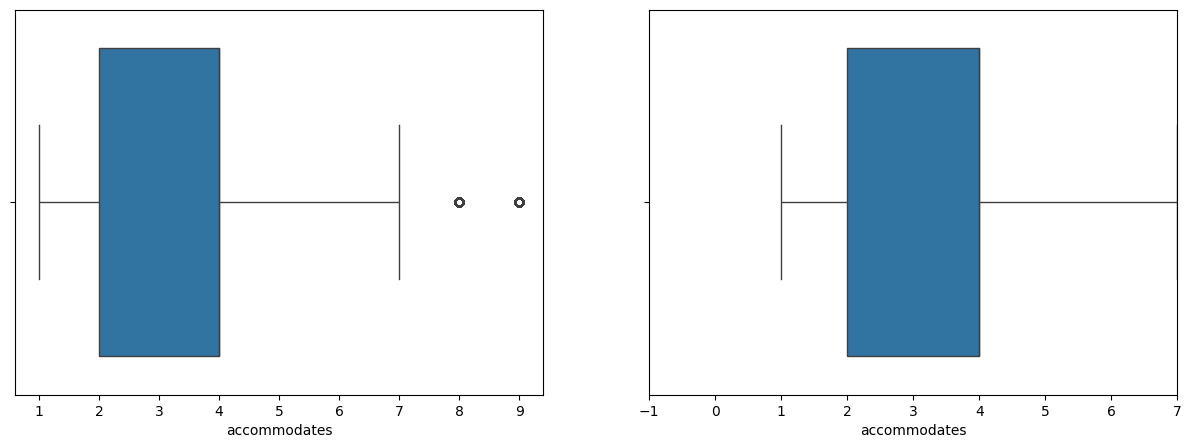

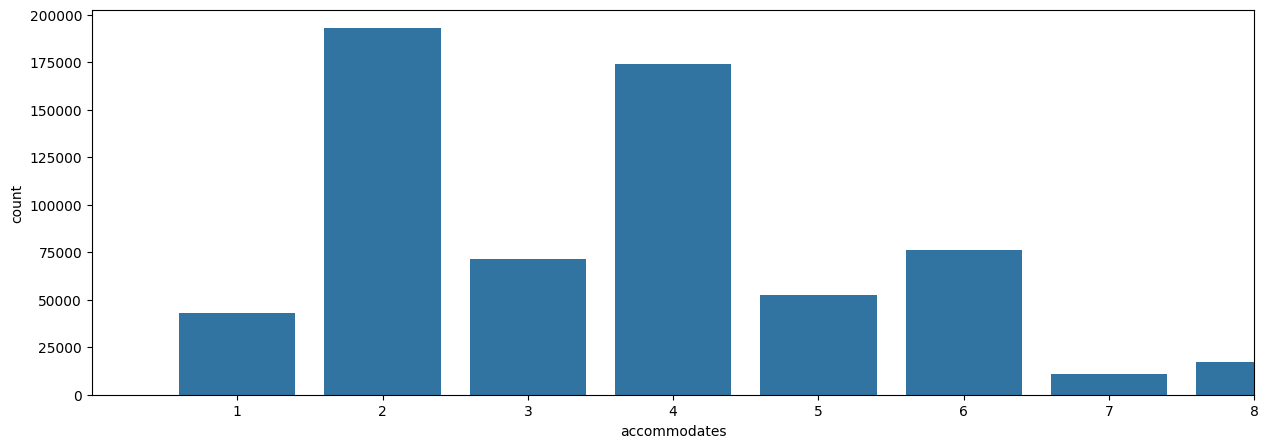

In [30]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

### Bathrooms

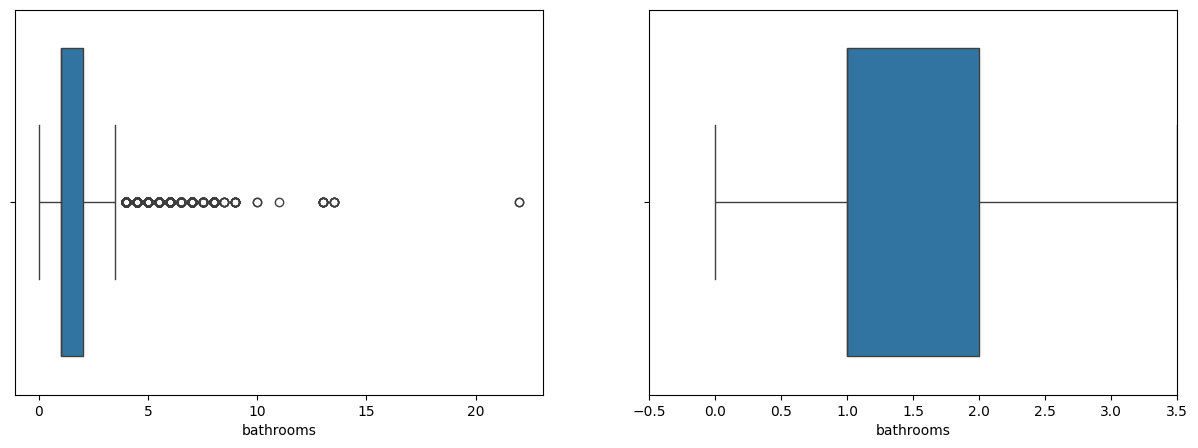

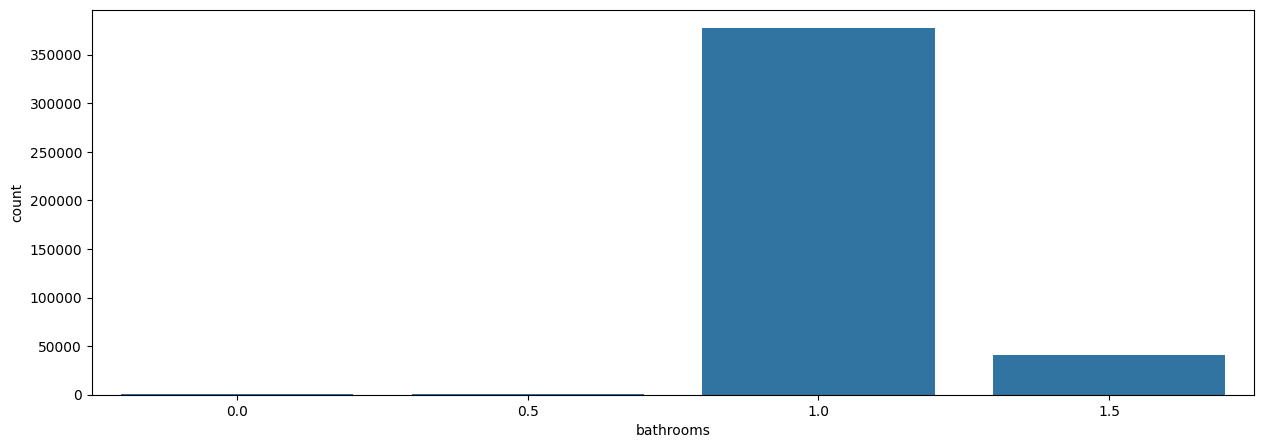

In [31]:
diagrama_caixa(base_airbnb['bathrooms'])
grafico_barra(base_airbnb['bathrooms'])

In [32]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


<Axes: xlabel='bathrooms', ylabel='count'>

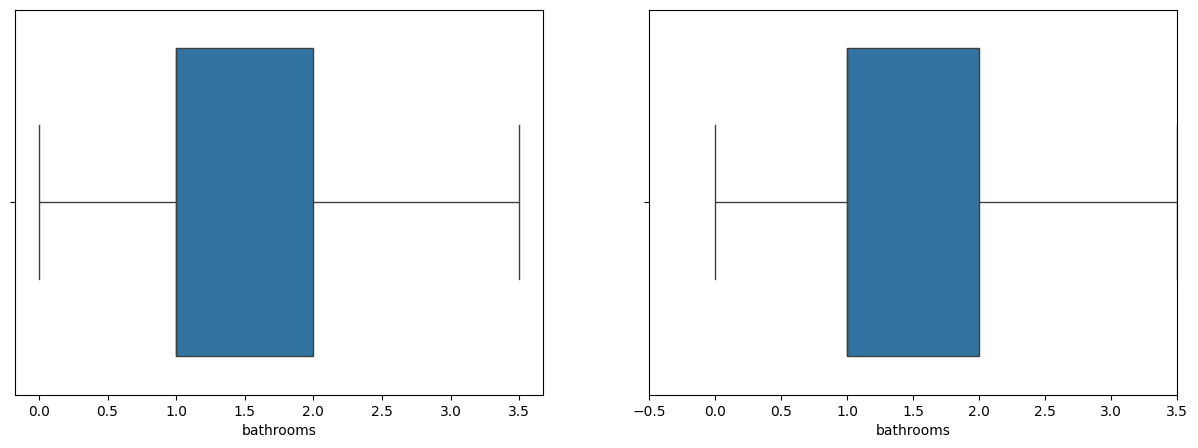

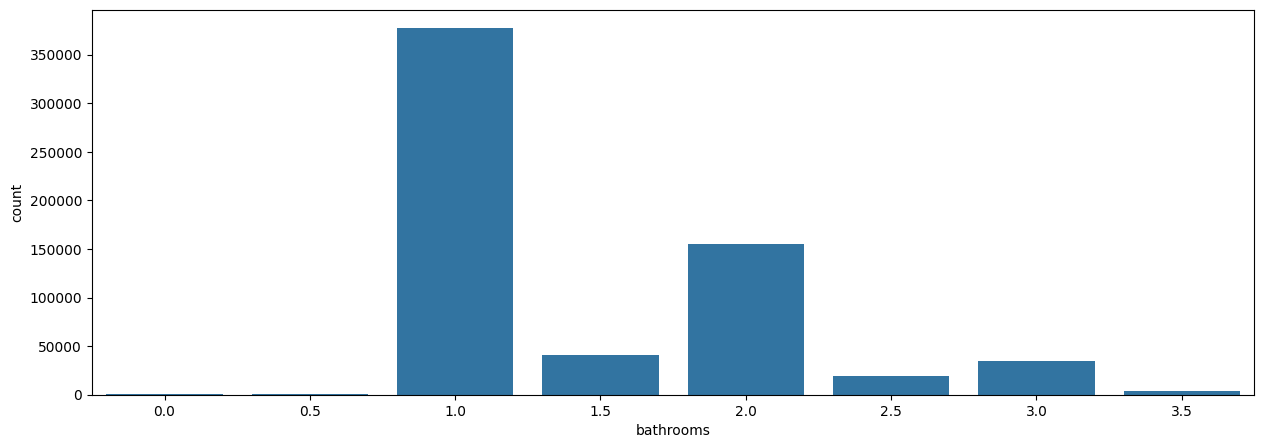

In [33]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

### Bedrooms

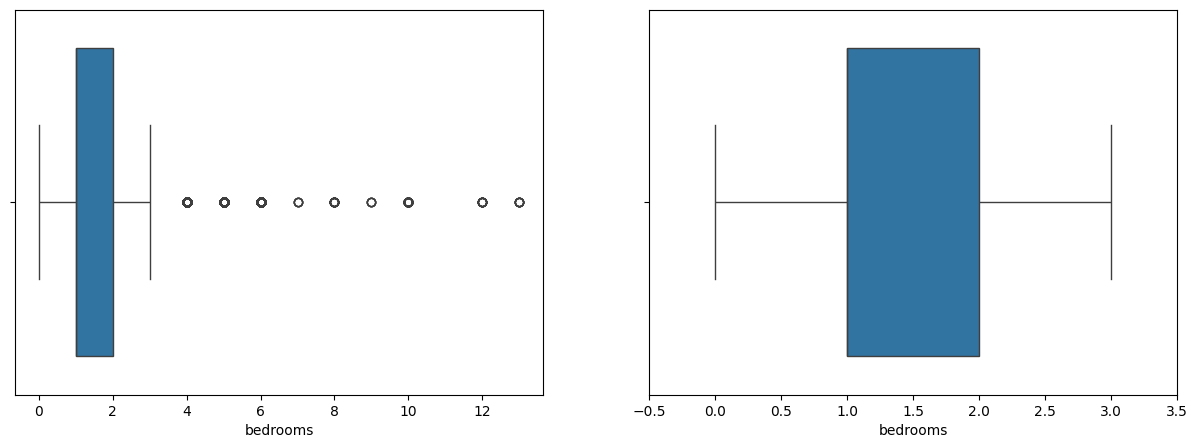

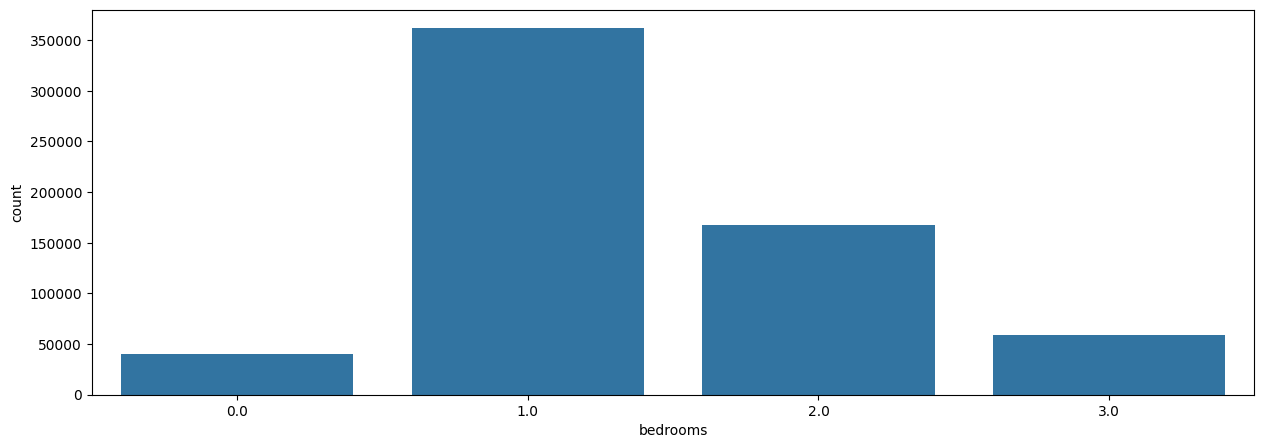

In [34]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [35]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

5482 linhas removidas


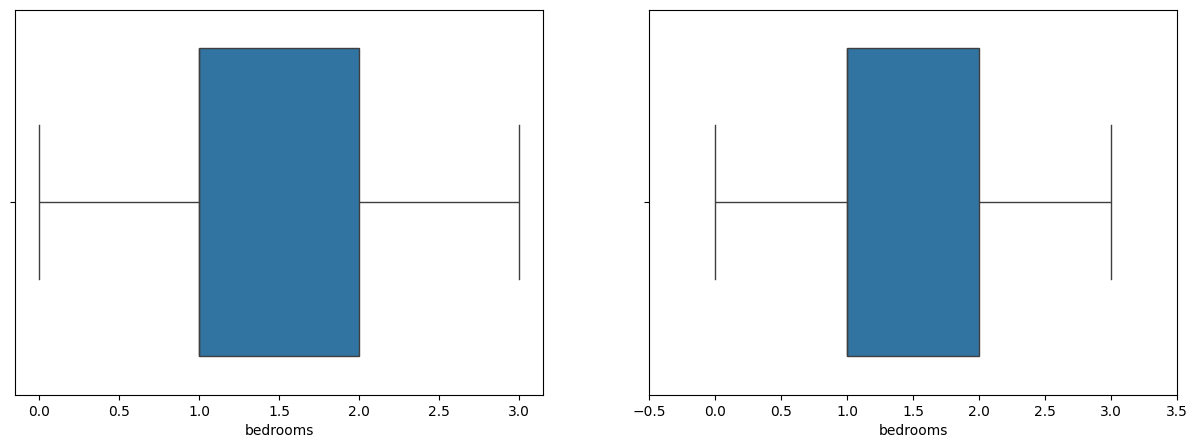

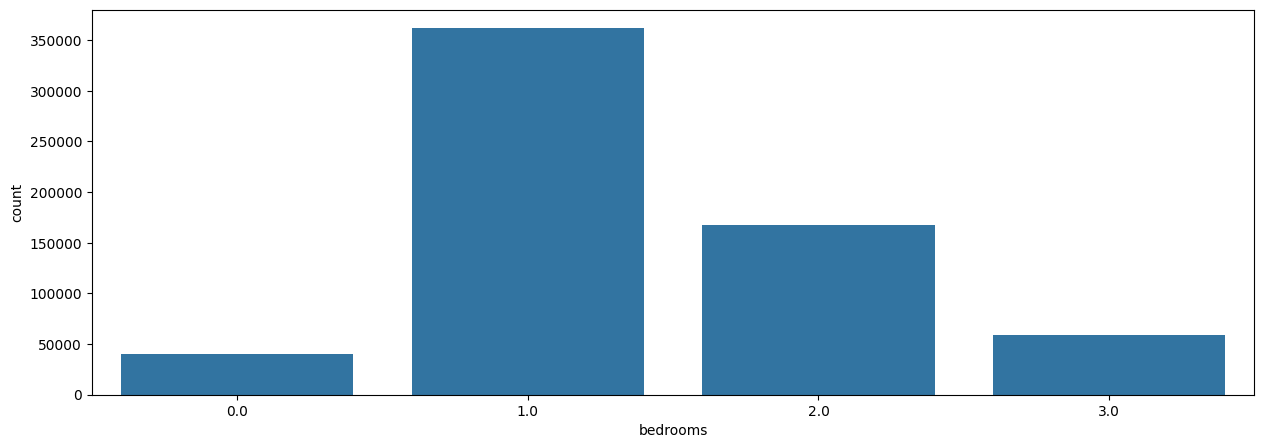

In [36]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

### Beds

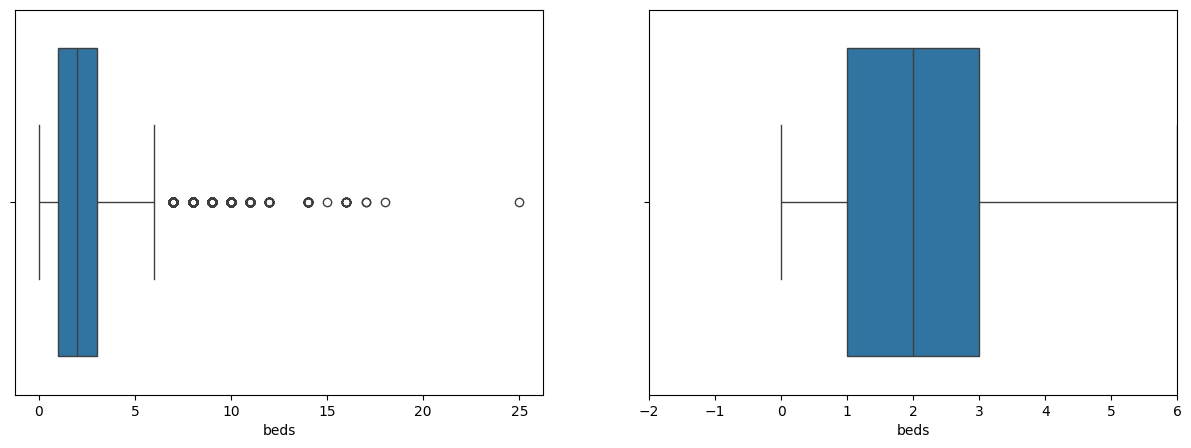

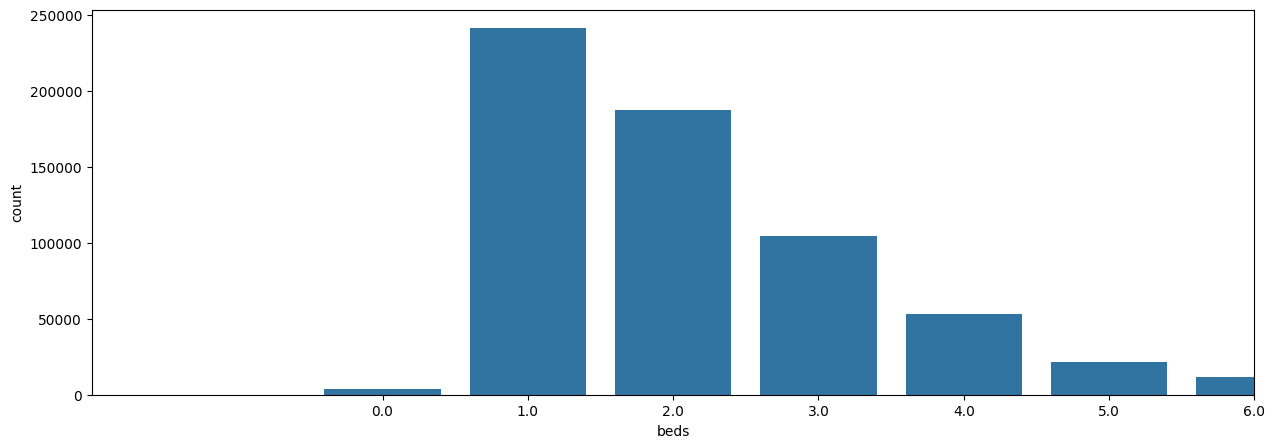

In [37]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [38]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

5622 linhas removidas


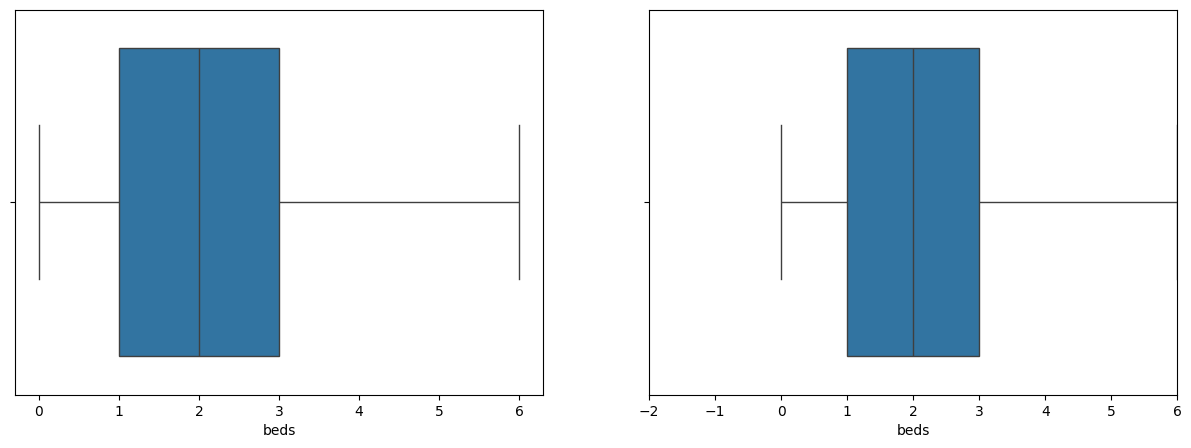

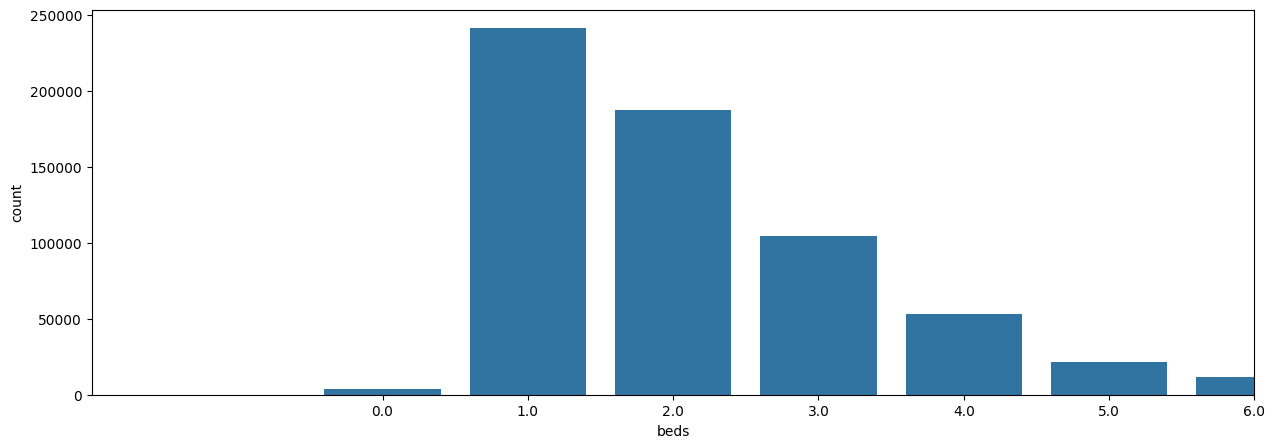

In [39]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

### Guests_included

In [40]:
#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])

print(limites(base_airbnb['guests_included']))

(np.float64(1.0), np.float64(1.0))


Vou remover essa feature da análise, pois parece que os usuarios do airbnb não preenchem essa opção da melhor forma, que torna dificil utilizar os dados na nossa análise

In [41]:
base_airbnb = base_airbnb.drop(['guests_included'], axis=1)

### Minimum_nights

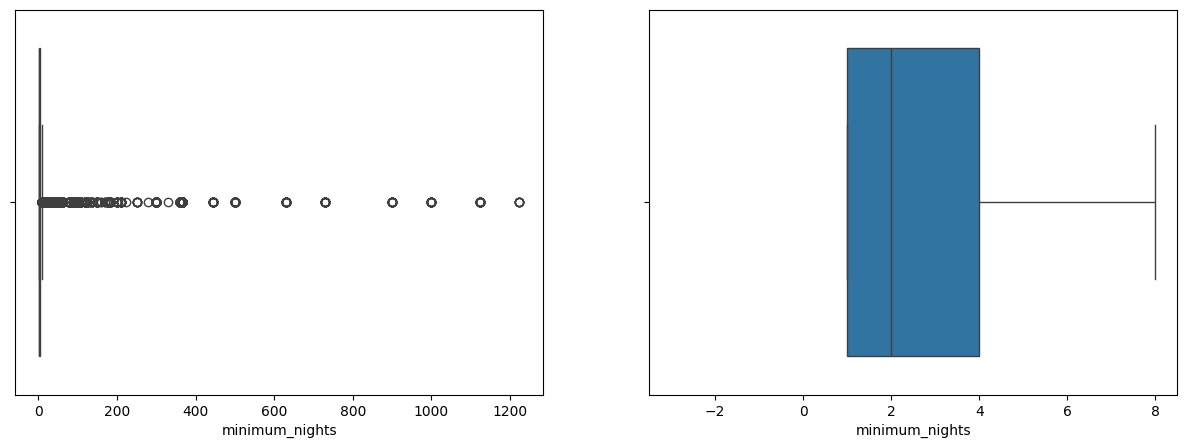

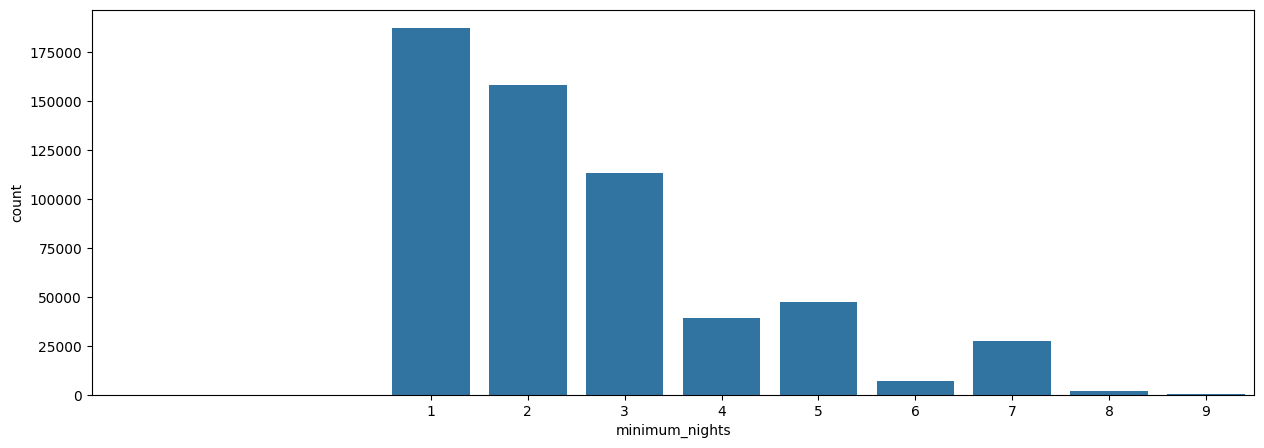

In [42]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [43]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


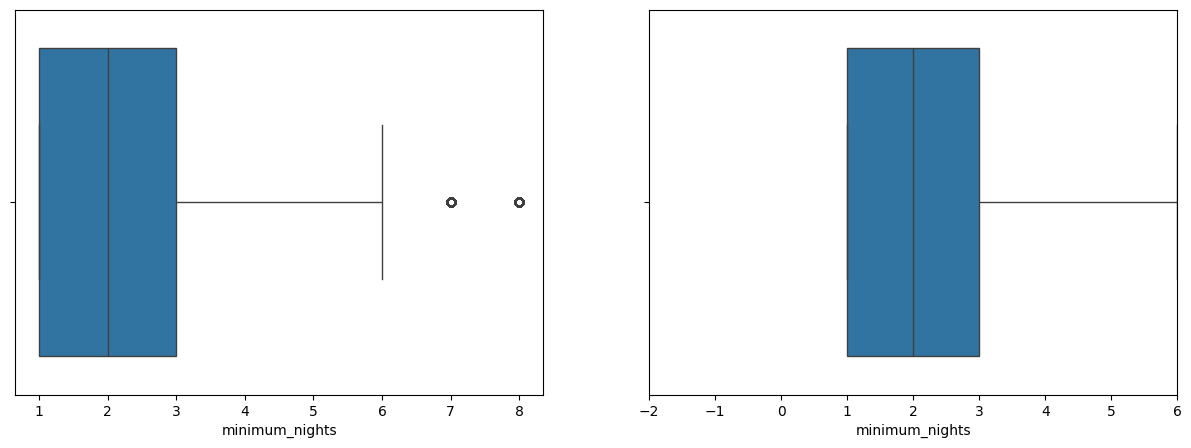

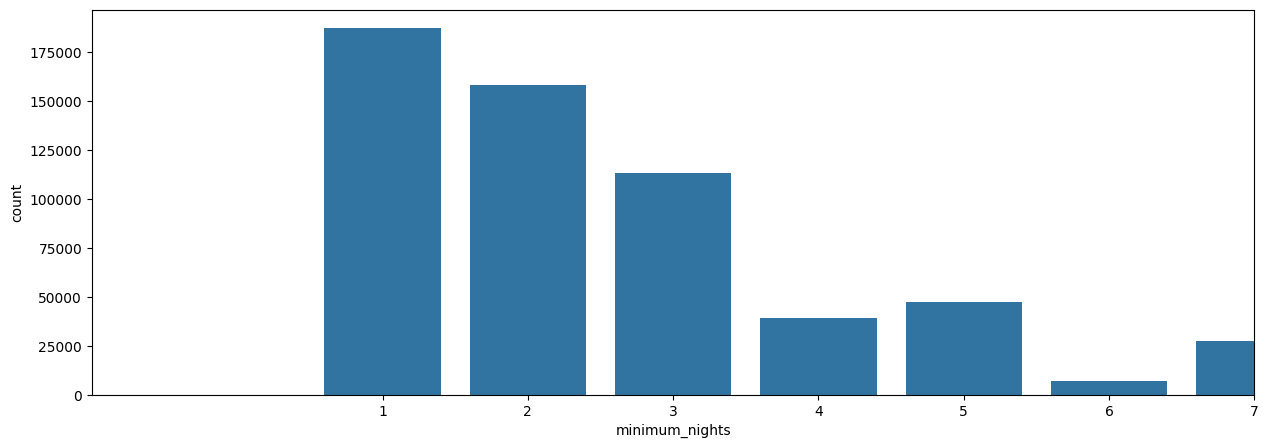

In [44]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

### Maximum_nights

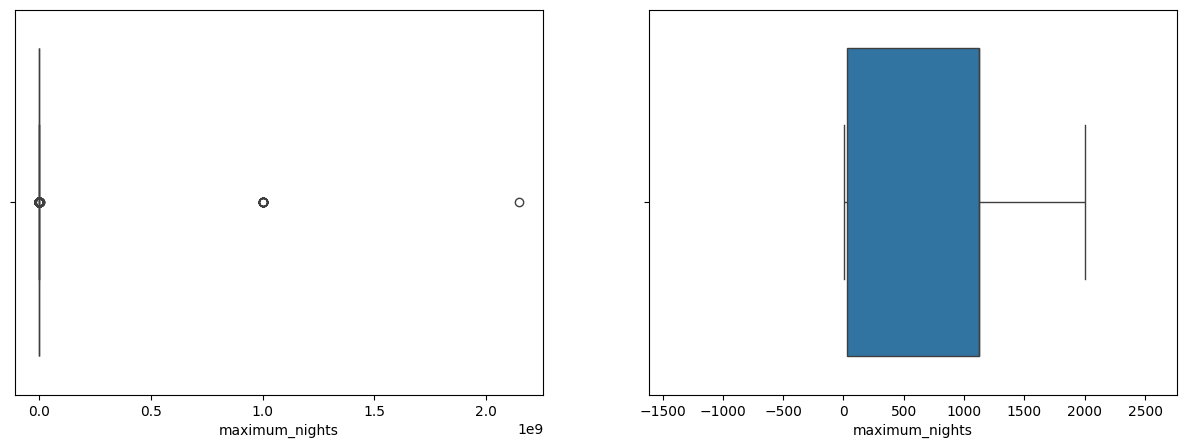

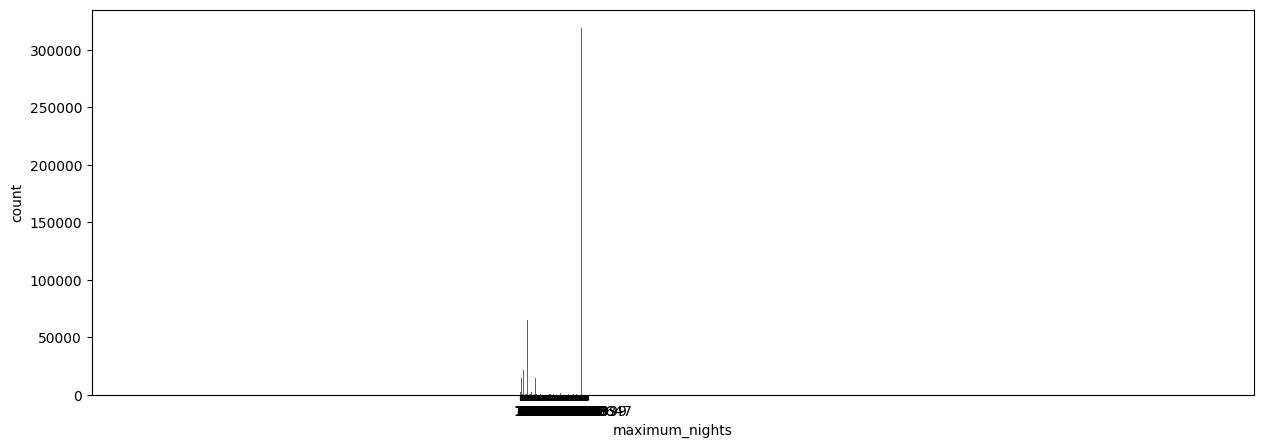

In [45]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [46]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'maximum_nights')
print('{} linhas removidas'.format(linhas_removidas))

187 linhas removidas


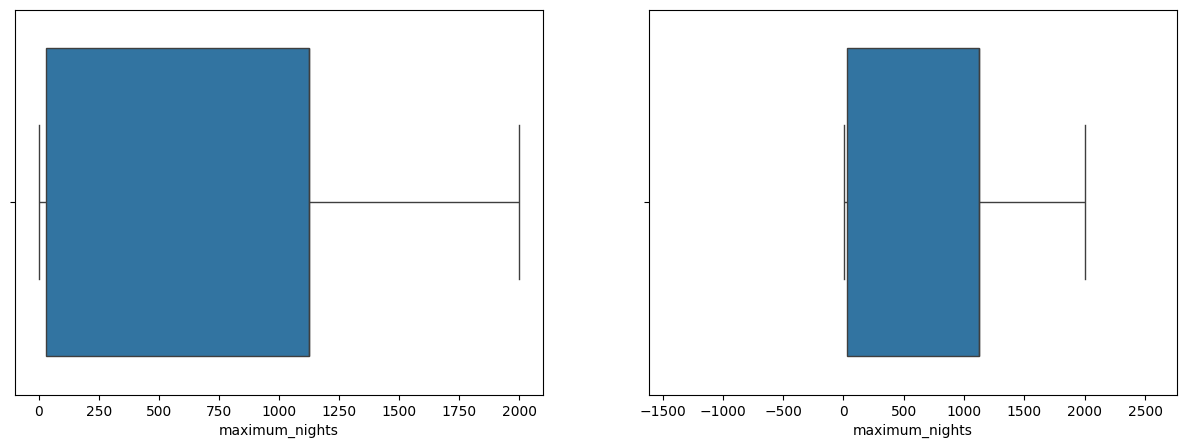

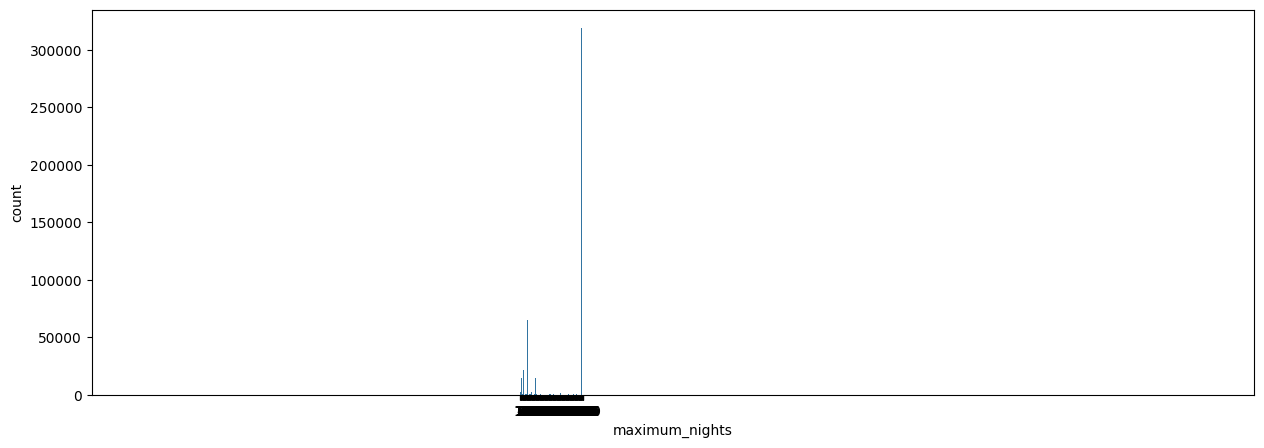

In [47]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

Ao analisar, vi que não fazia mt sentido os dados, pois provavelmente as pessoas nem se importaram em preencher

In [48]:
base_airbnb = base_airbnb.drop(['maximum_nights'], axis=1)
base_airbnb.shape

(581796, 21)

### Number_of_reviews 

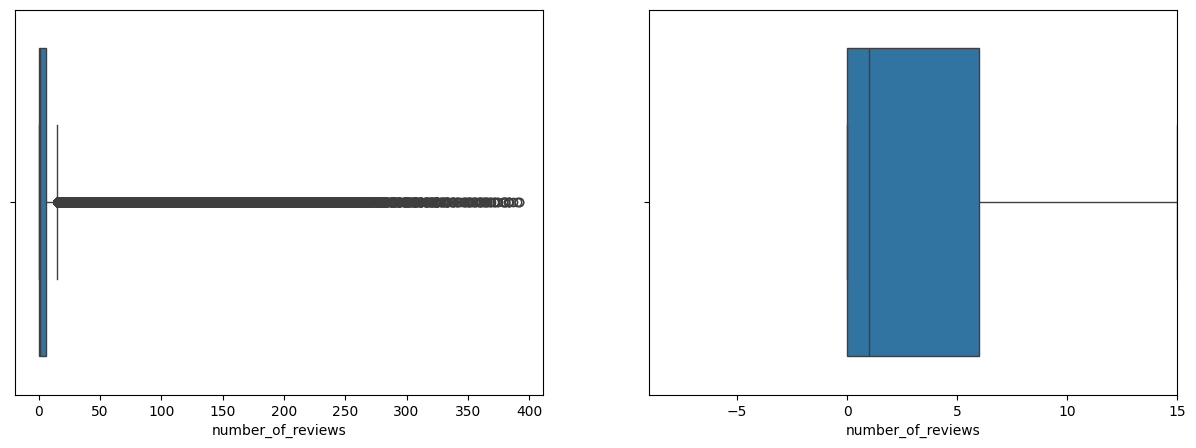

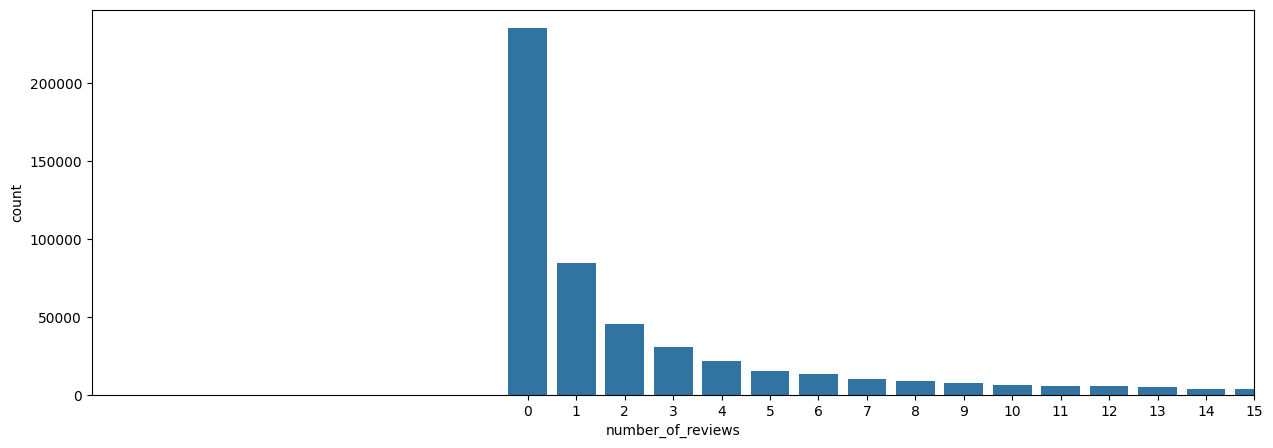

In [49]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

Como nosso modelo é basicamente feito para pessoas com poucos reviews, não vai importar muito a quantidade de reviews

In [50]:
base_airbnb = base_airbnb.drop(['number_of_reviews'], axis=1)
base_airbnb.shape

(581796, 20)

### Tratamento de Colunas de Valores de Texto

- property_type   

property_type
Apartment                 458189
House                      51370
Condominium                26456
Serviced apartment         12666
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

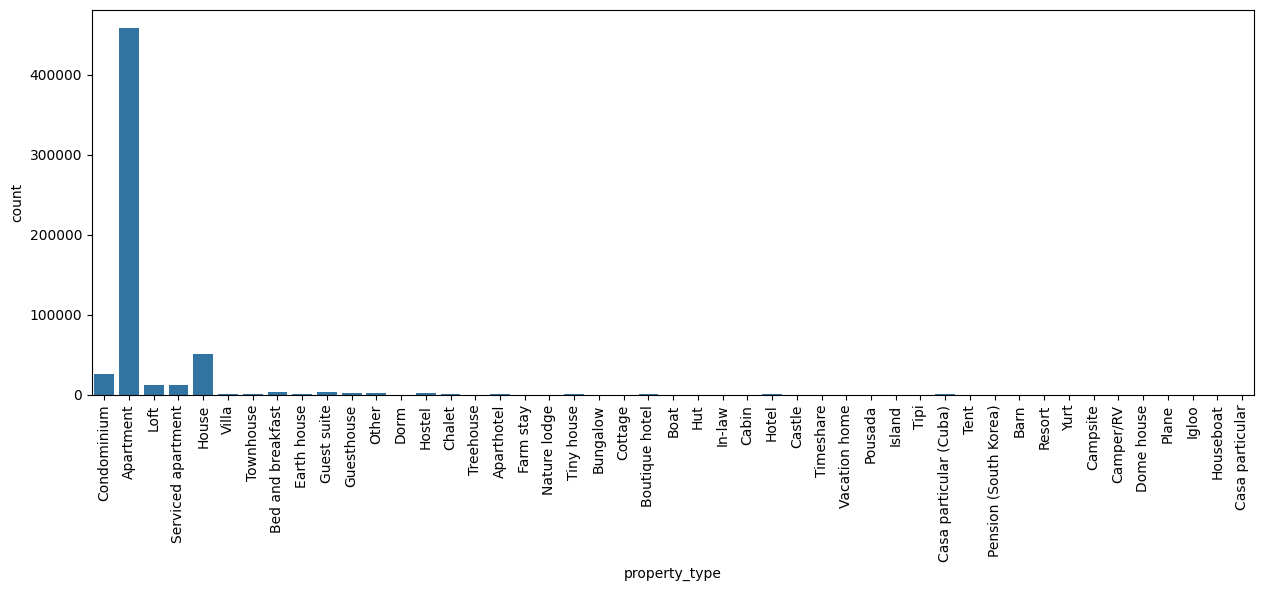

In [51]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='property_type')
grafico.tick_params(axis='x', rotation=90)

Como a predominancia de Apartment é muito grande e os maiores abaixo são House e Condominium, resolvi juntar todos abaixo desses 3 em Outros

['Serviced apartment', 'Loft', 'Guest suite', 'Bed and breakfast', 'Hostel', 'Guesthouse', 'Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment      458189
House           51370
Outros          45781
Condominium     26456
Name: count, dtype: int64


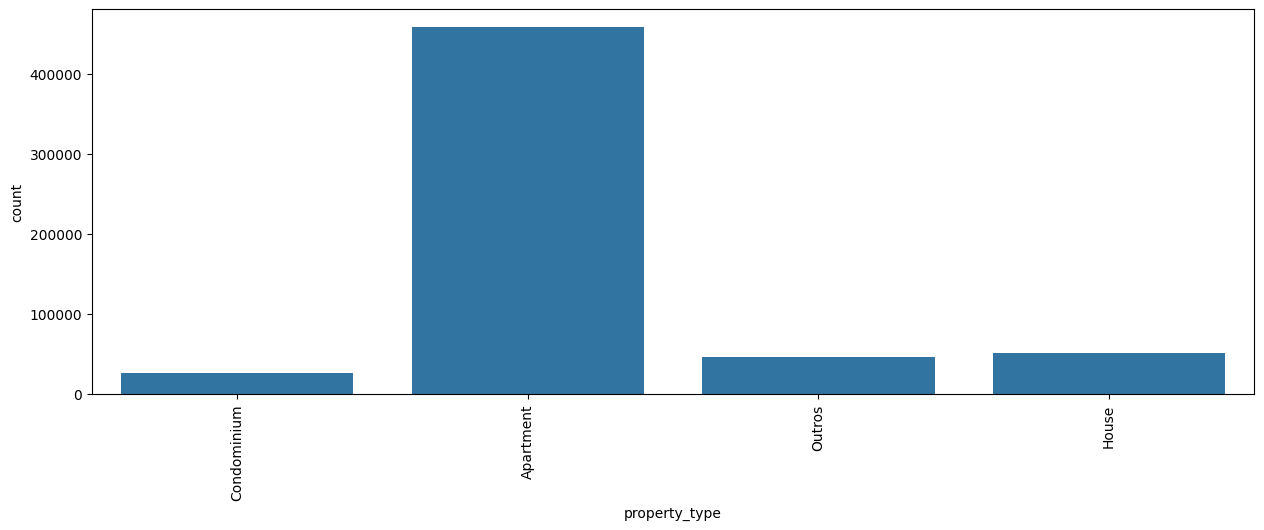

In [52]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 13000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='property_type')
grafico.tick_params(axis='x', rotation=90)


- room_type

room_type
Entire home/apt    372268
Private room       196851
Shared room         11710
Hotel room            967
Name: count, dtype: int64


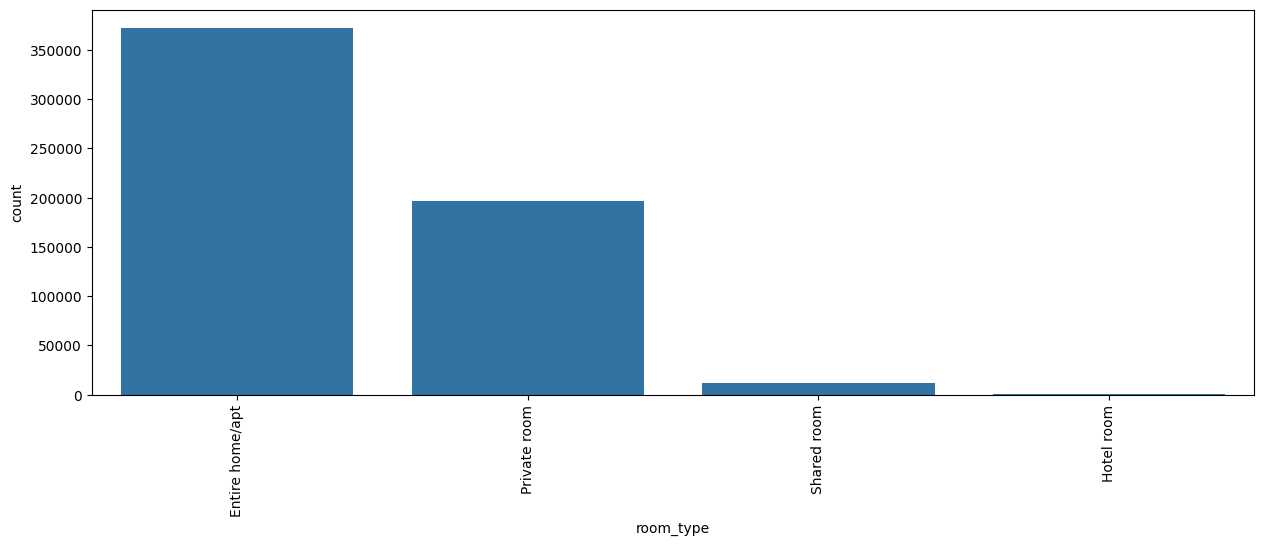

In [53]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='room_type')
grafico.tick_params(axis='x', rotation=90)

- bed_type

bed_type
Real Bed         570463
Pull-out Sofa      8055
Futon              1627
Airbed             1155
Couch               496
Name: count, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    570463
Outros       11333
Name: count, dtype: int64


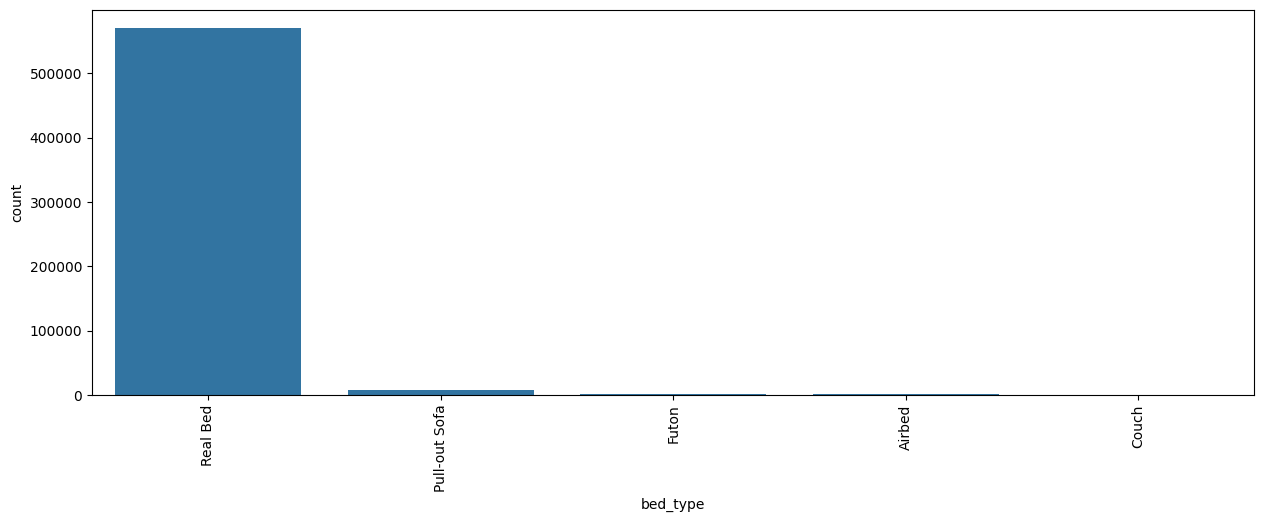

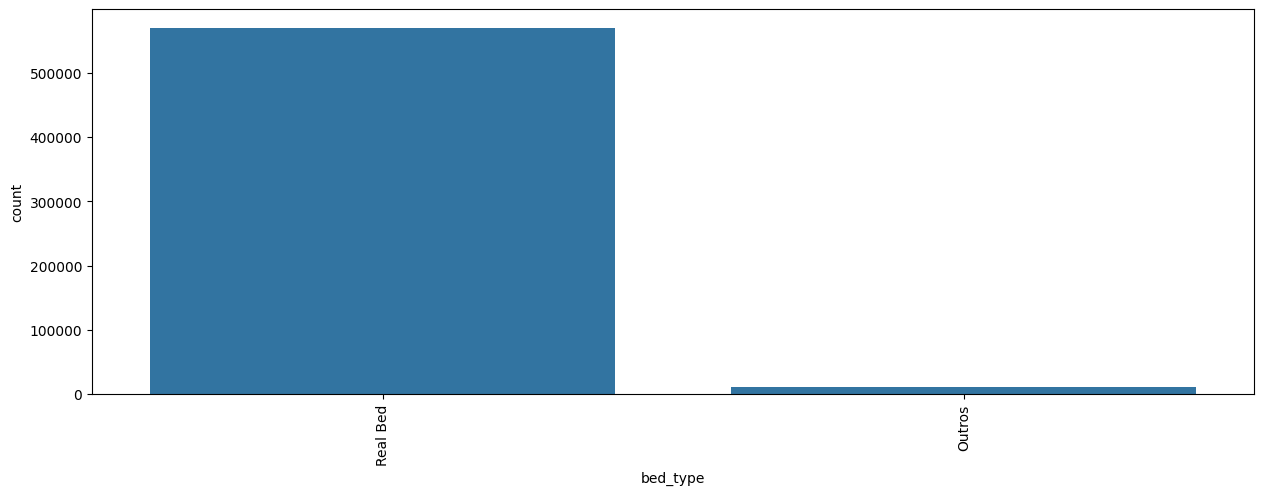

In [54]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='bed_type')
grafico.tick_params(axis='x', rotation=90)

# agrupando categorias de bed_type

tabela_cama = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_cama.index:
    if tabela_cama[tipo] < 10000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='bed_type')
grafico.tick_params(axis='x', rotation=90)

Por fim, após terminar o projeto e verificar que os tipos de cama nao são impactantes no modelo, resolvi voltar e retirar os tipos de cama

In [55]:
base_airbnb = base_airbnb.drop('bed_type', axis=1)
base_airbnb.columns

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'extra_people', 'minimum_nights',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'ano', 'mes'],
      dtype='object')

- cancellation_policy

cancellation_policy
flexible                       258085
strict_14_with_grace_period    200623
moderate                       113241
strict                           9680
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
cancellation_policy
flexible                       258085
strict_14_with_grace_period    200623
moderate                       113241
strict                           9847
Name: count, dtype: int64


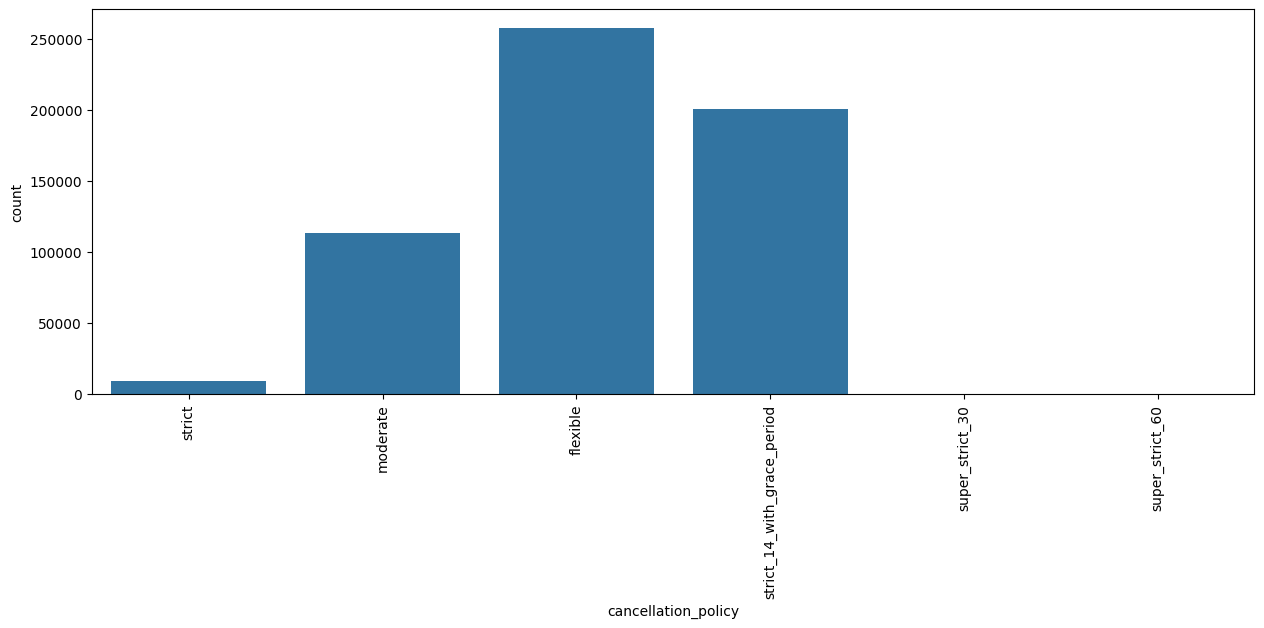

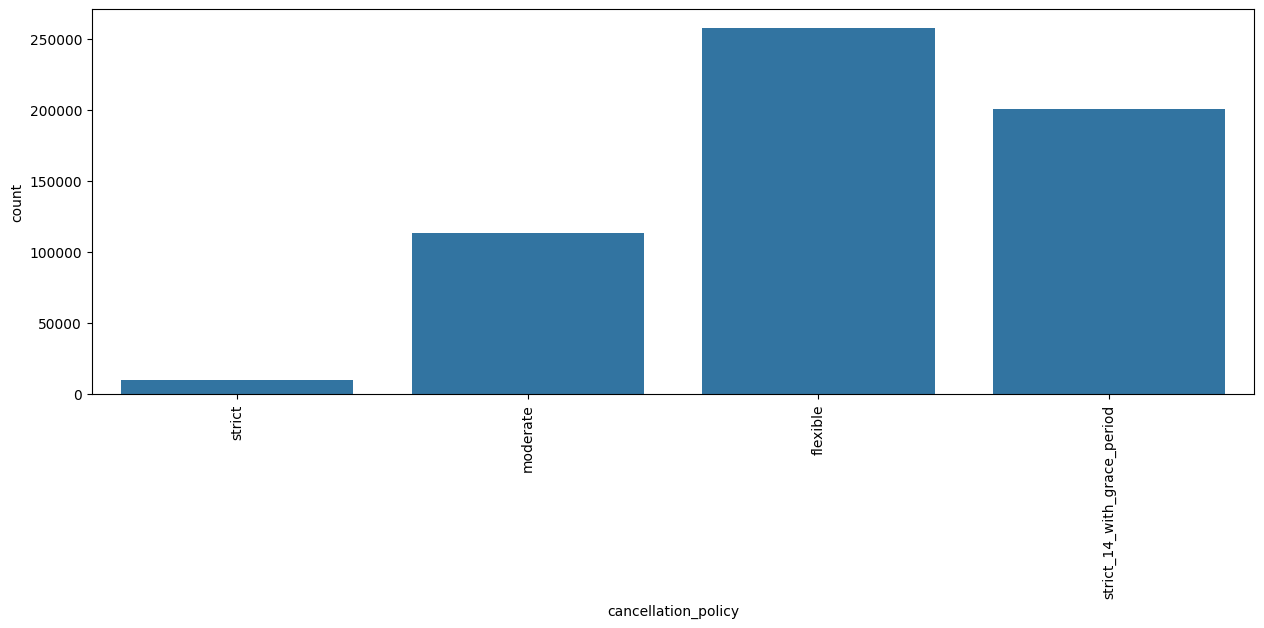

In [56]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='cancellation_policy')
grafico.tick_params(axis='x', rotation=90)

# agrupando categorias de cancellation_policy

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='cancellation_policy')
grafico.tick_params(axis='x', rotation=90)

Ao ver a disparidade entre as varias politicas de cancelamento, resolvi juntar as colunas com menos dados

- amenities

Como temos uma diversidade grande de amenities e as vezes as mesmas amenities podem ser escritas de forma diferente, vamos avaliar a quantidade de amenities que cada imovel tem como parametro para nosso modelo.

In [57]:
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

In [58]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581796, 19)

### Excluindo Outliers de n_amenities

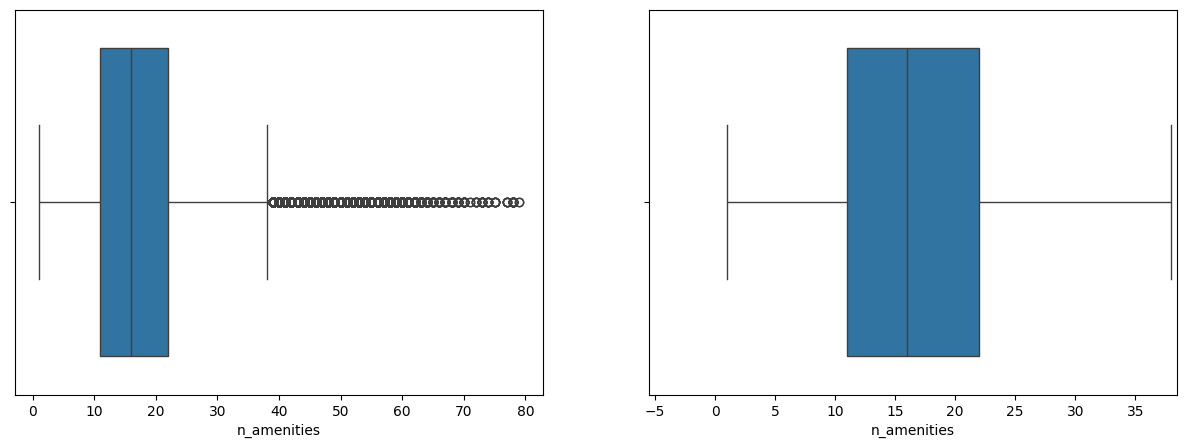

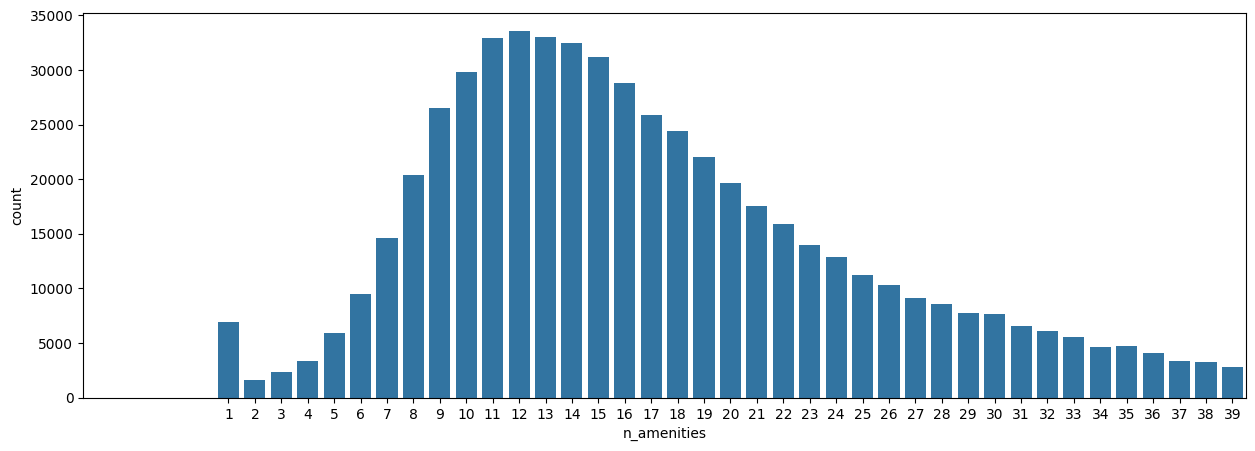

In [59]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [60]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

24333 linhas removidas


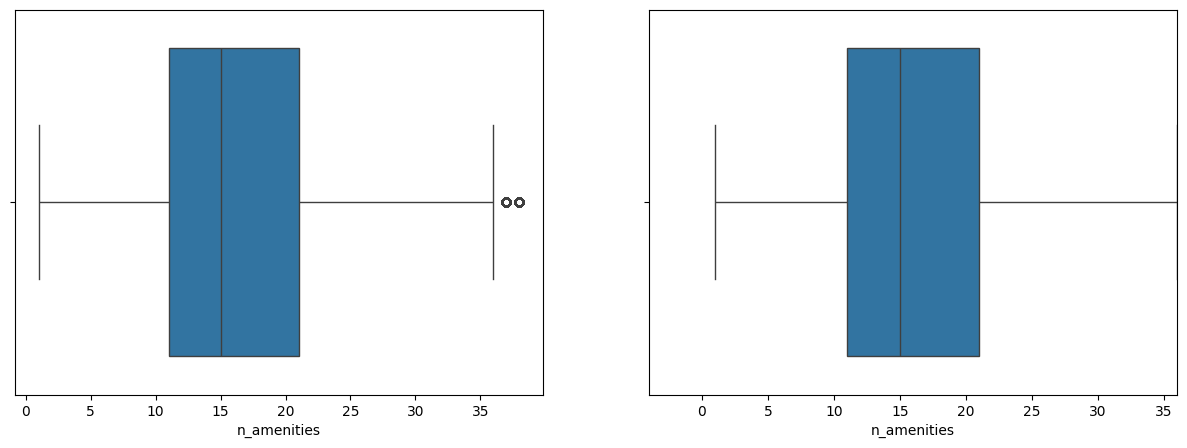

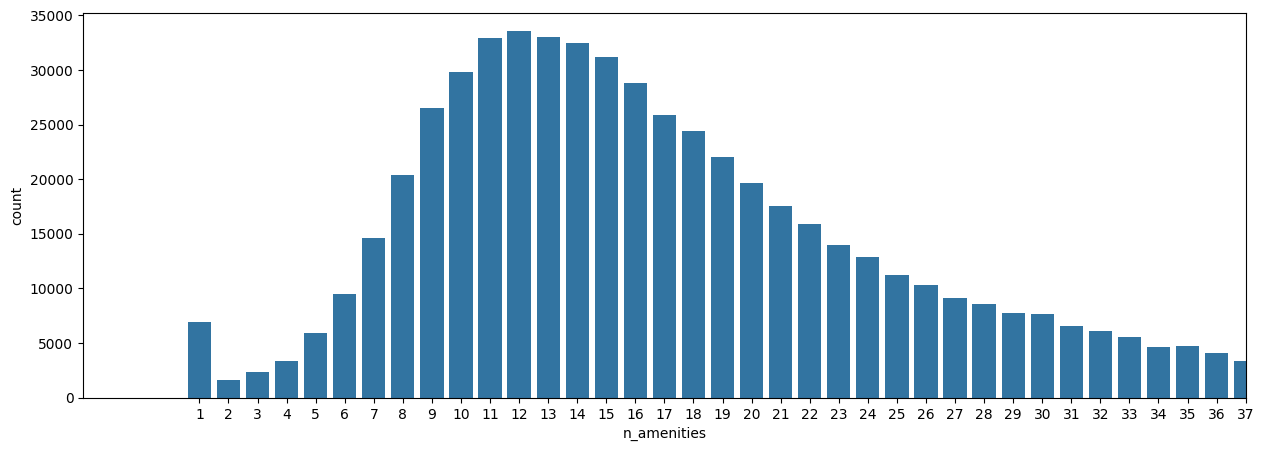

In [61]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

### Visualização de Mapa das Propriedades

In [62]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, center=centro_mapa, zoom=10, mapbox_style='open-street-map')

mapa.show()

### Encoding

Precisamos ajustar as features para facilitar o trabalho do modelo (features de categoria, true e false, etc)

- Features de Valores True ou False iremos substituir por 1 ou 0
- Features de Categoria com textos iremos utilizar o método de encoding de variáveis dummies.

In [63]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0

In [64]:
colunas_categorias = ['property_type', 'room_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)

display(base_airbnb_cod.head)

<bound method NDFrame.head of       host_is_superhost  host_listings_count   latitude  longitude  \
1                     1                  2.0 -22.965919 -43.178962   
3                     0                  3.0 -22.977117 -43.190454   
4                     1                  1.0 -22.983024 -43.214270   
5                     1                  1.0 -22.988165 -43.193588   
6                     1                  1.0 -22.981269 -43.190457   
...                 ...                  ...        ...        ...   
34323                 0                  1.0 -22.986030 -43.191660   
34324                 0                  0.0 -23.003180 -43.342840   
34325                 0                  0.0 -22.966640 -43.393450   
34327                 0                  0.0 -23.003400 -43.341820   
34328                 0                  5.0 -23.010560 -43.363350   

       accommodates  bathrooms  bedrooms  beds  price  extra_people  ...  \
1                 5        1.0       2.0   2.0  270.0

### Modelo de Previsão

- Métricas de Avaliação

In [65]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    rsme = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{rsme:.2f}'

- Escolha dos Modelos a serem testados

    1. Random Forest
    2. Linear Regression
    3. Extra Tree

In [66]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf, 
           'LinearRegression': modelo_lr, 
           'ExtraTrees': modelo_et}

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

- Separa os dados em treino e teste + Treino do Modelo

In [67]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_treino, y_treino)
    #testar
    previsao = modelo.predict(X_teste)
    print(avaliar_modelo(nome_modelo, y_teste, previsao))

Modelo RandomForest:
R²:97.20%
RSME:44.28
Modelo LinearRegression:
R²:33.02%
RSME:216.73
Modelo ExtraTrees:
R²:97.45%
RSME:42.29


- Modelo Escolhido como melhor modelo foi o ExtraTreesRegressor
    Esse foi o Modelo com maior valor de r² e ao mesmo tempo menor valor de RSME. Como não tivemos uma grande <br>
    diferença de velocidade de treino e de previsão desse modelo com o RandomForest que tiveram resultados <br>
    proximos mas abaixo.<br>
- O modelo de regressao linear nao obteve resultados aceitaveis.

- Resultado das Métricas de Avaliação do modelo vencedor: <br>
    Modelo ExtraTrees:<br>
    R²:97.44%<br>
    RSME:42.36

0
bedrooms                                         0.120386
latitude                                         0.106172
longitude                                        0.103833
n_amenities                                      0.090186
extra_people                                     0.086893
accommodates                                     0.074795
minimum_nights                                   0.065980
bathrooms                                        0.065163
room_type_Entire home/apt                        0.062104
beds                                             0.053336
host_listings_count                              0.040458
instant_bookable                                 0.021934
cancellation_policy_flexible                     0.019483
host_is_superhost                                0.013455
property_type_Apartment                          0.012738
cancellation_policy_moderate                     0.012607
ano                                              0.011617
cancellation_policy_strict_14_with_grace_period  0.007935
property_type_House                              0.007112
property_type_Outros                             0.005625
property_type_Condominium                        0.005474
mes                                              0.004803
room_type_Private room                           0.004742
room_type_Shared room                            0.002005
cancellation_policy_strict                       0.000863
room_type_Hotel room                             0.000303
is_business_travel_ready                         0.000000

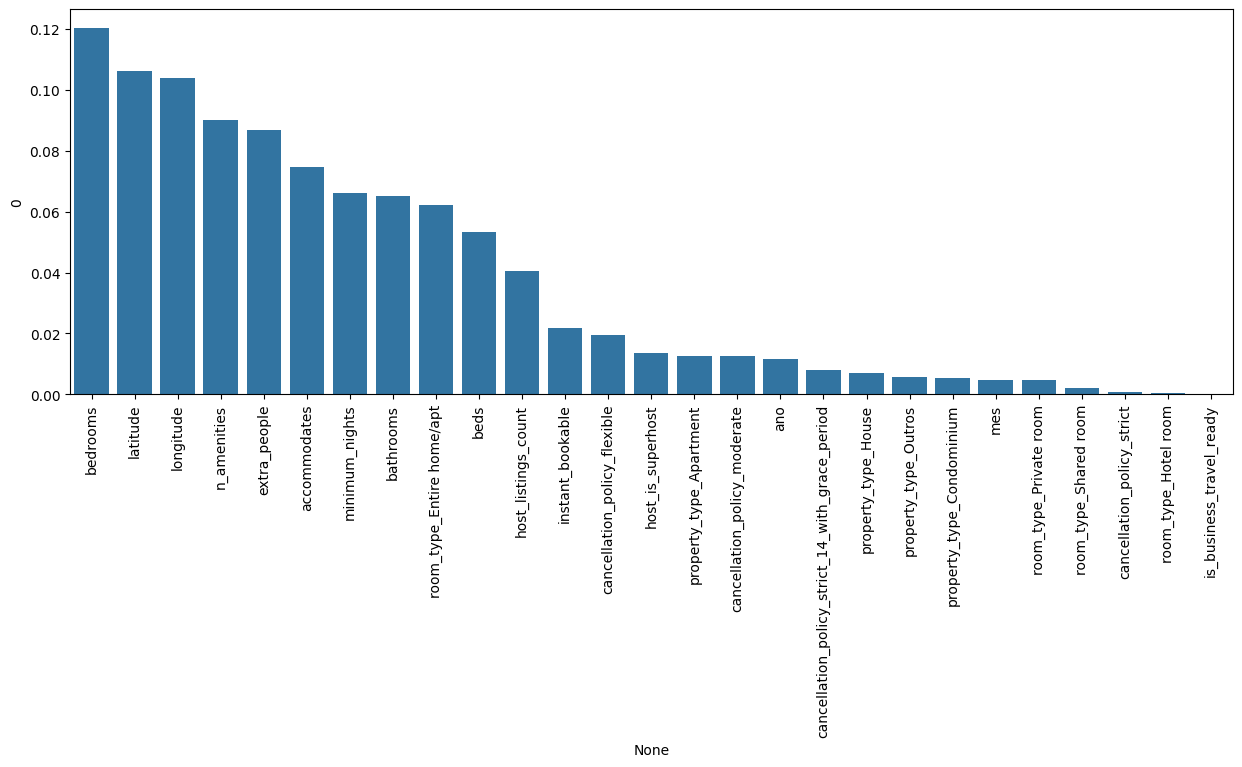

In [68]:
#print(modelo_et.feature_importances_)
#print(X_treino.columns)
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_treino.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Ajustes Finais no Modelo

- Ao analisar o impacto de cada feature no nosso modelo, podemos perceber que alguns tem muito mais impacto que outros, o que parece logico 
quando analisamos os tipos de feature como quantidade de quartos e localização, que aparentemente são muito importantes no Rio de Janeiro.
Assim, também percebemos que uma das features não tem nenhum impacto no modelo, e nosso proximo passo será removê-la para simplificar o 
modelo e treiná-lo novamente para verificar qualquer impacto positivo.


In [69]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

print(base_airbnb_cod.columns)

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=10)

modelo_et.fit(X_treino, y_treino)
previsao = modelo_et.predict(X_teste)
print(avaliar_modelo('ExtraTrees', y_teste, previsao))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Outros',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Modelo ExtraTrees:
R²:97.45%
RSME:42.33


### Deploy do Projeto

In [70]:
X['price'] = y
X.to_csv('dados.csv')

In [71]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')